In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

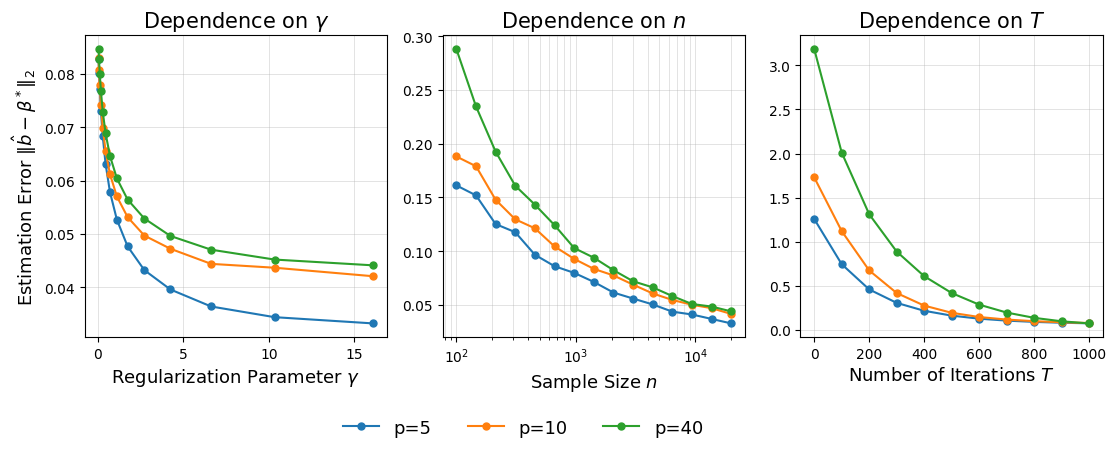

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# ------------------------ config ------------------------
ps = [5, 10, 40]
LOG_INTERVAL_T = 100  # for the T panel
# gammas grid (same rounding as your files use)
gammas = np.round(10**np.linspace(-1.3, 1.4, 15), 3)[:-1]
# n grid (geom-spaced; adjust if your files expect a specific set)
ns = np.unique(np.round(np.geomspace(100, 20000, 15)).astype(int))

# ------------------------ fig setup ------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=False)
ax_g, ax_n, ax_t = axes

legend_lines = []
legend_labels = []

# ======================== Left: gamma ========================
for p in ps:
    # collect errors over simrounds for each gamma
    err_by_gamma = {g: [] for g in gammas}
    for simround in range(1, 5):
        filename = f'results-exp1/results/comp_gamma_p{p}_simround{simround}.pkl'
        with open(filename, 'rb') as f:
            results = pickle.load(f)
        for g in gammas:
            err_by_gamma[g].extend(results['errors'][g])

    # stack seeds/runs → mean over axis=0
    errors_mat = np.vstack([np.array(err_by_gamma[g]) for g in gammas]).T  # shape (runs, len(gammas))
    y_mean = errors_mat.mean(axis=0)

    line, = ax_g.plot(gammas, y_mean, linewidth=1.5, marker='o', markersize=5, label=f"p={p}")
    # only take legend entries from this (left) panel
    legend_lines.append(line)
    legend_labels.append(f"p={p}")

ax_g.set_title(r"Dependence on $\gamma$", fontsize=15)
ax_g.set_xlabel(r'Regularization Parameter $\gamma$', fontsize=13)
ax_g.set_ylabel(r'Estimation Error $\|\hat{b} - \beta^*\|_2$', fontsize=13)

# ======================== Middle: n ========================
for p in ps:
    err_by_n = {n: [] for n in ns}
    for simround in range(1, 5):
        filename = f'results-exp1/results/comp_n_p{p}_simround{simround}.pkl'
        with open(filename, 'rb') as f:
            results = pickle.load(f)
        for n in ns:
            err_by_n[n].extend(results['errors'][n])

    errors_mat = np.vstack([np.array(err_by_n[n]) for n in ns]).T
    y_mean = errors_mat.mean(axis=0)

    ax_n.plot(ns, y_mean, linewidth=1.5, marker='o', markersize=5, label=f"p={p}")

ax_n.set_title(r"Dependence on $n$", fontsize=15)
ax_n.set_xlabel(r'Sample Size $n$', fontsize=13)
ax_n.set_xscale('log')  # better spacing on n

# ======================== Right: T ========================
for p in ps:
    # collect arrays per simround directly
    runs = []
    for simround in range(1, 5):
        filename = f'results-exp1/results/comp_T_p{p}_simround{simround}.pkl'
        with open(filename, 'rb') as f:
            results = pickle.load(f)
        runs.append(np.asarray(results['errors'], dtype=float))
    errors_mat = np.vstack(runs)  # shape (runs, T_logs)
    y_mean = errors_mat.mean(axis=0)

    T_logs = len(y_mean)
    t_full = np.arange(T_logs) * LOG_INTERVAL_T
    # window as in your code (0..800); adjust if you want full
    mask = (t_full >= 0) & (t_full <= 1000)
    t = t_full[mask].astype(float)
    y = y_mean[mask]

    ax_t.plot(t, y, linewidth=1.5, marker='o', markersize=5, label=f"p={p}")

ax_t.set_title(r"Dependence on $T$", fontsize=15)
ax_t.set_xlabel(r'Number of Iterations $T$', fontsize=13)

# ------------------------ common styling ------------------------
for ax in axes:
    ax.grid(True, which="both", ls="-", linewidth=0.5, alpha=0.5)

# single shared legend (from left panel's lines)
fig.legend(legend_lines, legend_labels, loc='lower center', ncol=3, frameon=False, title=None,
           bbox_to_anchor=(0.5, -0.02), fontsize=13)

fig.tight_layout(rect=[0.06, 0.08, 1, 1])
# fig.savefig('summary_gamma_n_T.png', dpi=300, bbox_inches='tight')
plt.show()